## Express mask with plotly

I aimed to visualize the original picture and the mask separately.

Currently, size adjustment and mask function by type are not implemented, only simple buttons are implemented.

Still, I hope there will be a lot of use in competitions where masks will be used later, and I will continue to evolve this kernel.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
from PIL import Image 
import warnings
warnings.filterwarnings("ignore")

path = '/kaggle/input/severstal-steel-defect-detection/'
train = pd.read_csv(path + 'train.csv')
train = train[ train['EncodedPixels'].notnull() ]
train.head()

ImageId_ClassId                                      EncodedPixels
0   0002cc93b.jpg_1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
18  0007a71bf.jpg_3  18661 28 18863 82 19091 110 19347 110 19603 11...
20  000a4bcdd.jpg_1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
27  000f6bf48.jpg_4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
30  0014fce06.jpg_3  229501 11 229741 33 229981 55 230221 77 230468...

In [3]:
# https://www.kaggle.com/titericz/building-and-visualizing-masks
def rle2mask(rle, imgshape):
    width = imgshape[0]
    height= imgshape[1]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
        
    return np.flipud( np.rot90( mask.reshape(height,width), k=1 ) )


In [4]:
import plotly.graph_objects as go

def interactive_mask(img_title, img, msk):
    img_width, img_height = 1600, 256
    scale_factor = 1.0
    fig = go.Figure()
    image = Image.fromarray(img.astype('uint8'))
    fig.add_trace(
        go.Heatmap(z=msk[::-1], colorscale="Reds", opacity=0.2, showscale=False)
    )
 
    
    fig.update_layout(
        title=go.layout.Title(
            text=img_title,
        ),
        images=[go.layout.Image(
            x=0,
            sizex=img_width * scale_factor,
            y=img_height * scale_factor,
            sizey=img_height * scale_factor,
            xref="x",
            yref="y",
            opacity=1.0,
            layer="below",
            sizing="stretch",
            source=image)],
        updatemenus=[
            go.layout.Updatemenu(
            type="buttons",
            active=0,
            buttons=list([
                dict(label="With Filter",
                     method="update",
                     args=[{"visible": [True]},
                           {"title": "All Case"}]),
                dict(label="Picture",
                     method="update",
                     args=[{"visible": [False]},
                           {"title": "All Case"}]),
            ]),
        )
    ]
    )


    fig.update_xaxes( visible=False, range=[0, img_width * scale_factor] )
    fig.update_yaxes( visible=False, range=[0, img_height * scale_factor], scaleanchor="x")
    fig.update_layout( width=img_width * scale_factor, height=img_height * scale_factor, 
                      margin={"l": 0, "r": 0, "t": 25, "b": 20}, autosize=True
                     )


    fig.show()


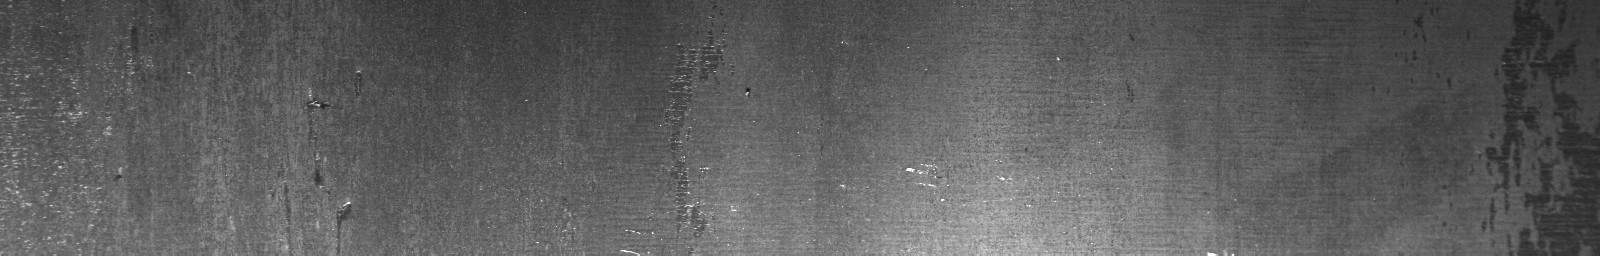


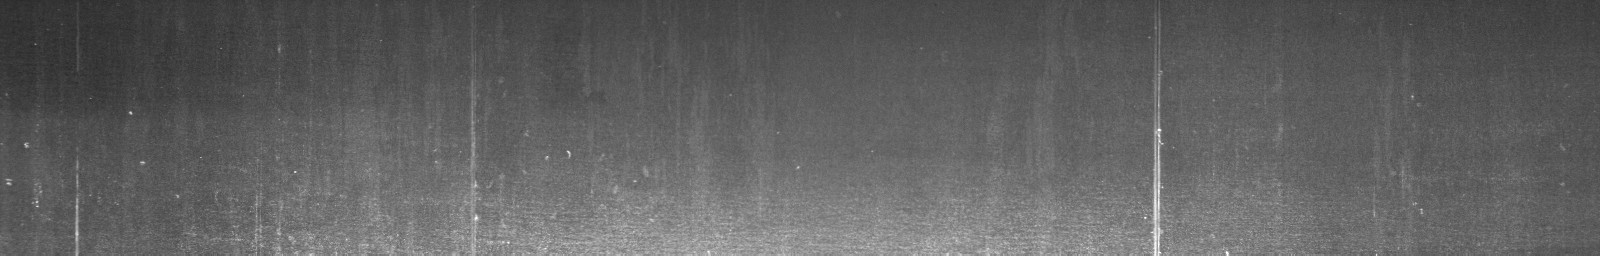


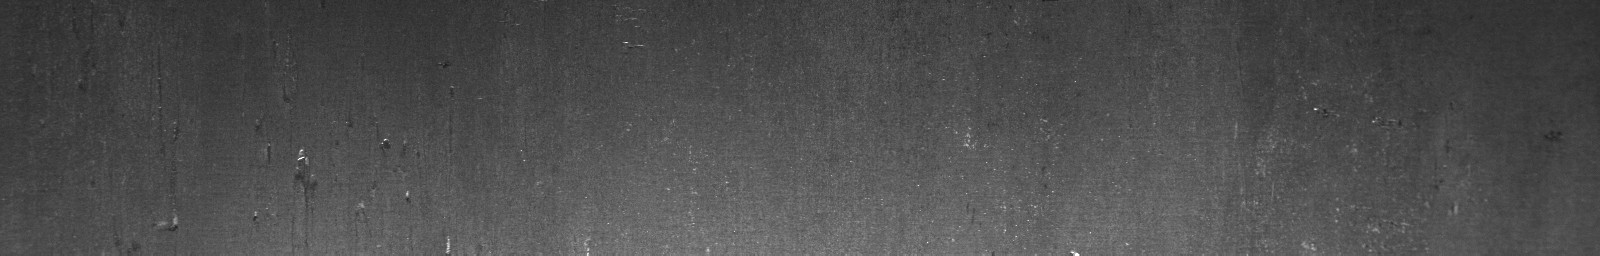


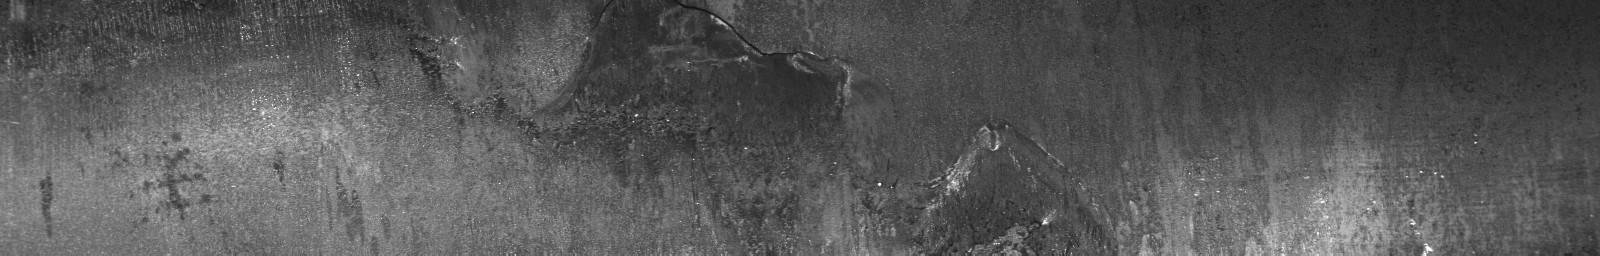


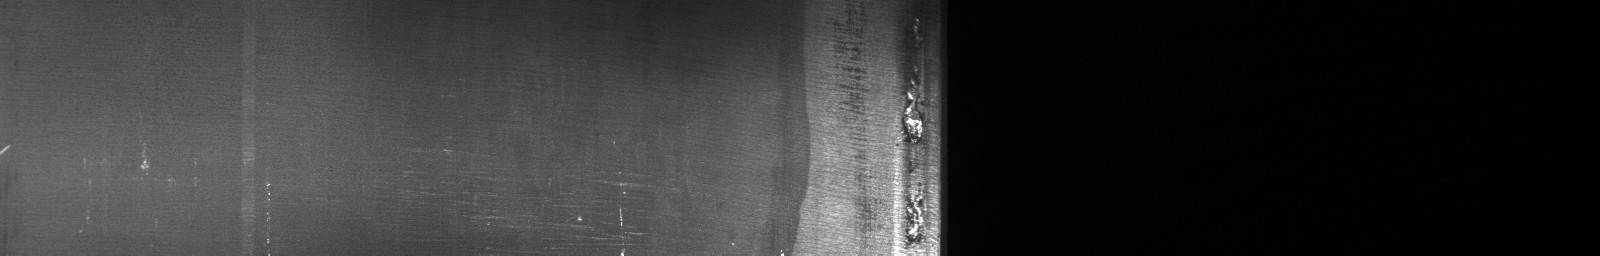

In [5]:
import cv2

for i in range(5):
    fn = train['ImageId_ClassId'].iloc[i].split('_')[0]
    img = cv2.imread( path+'/train_images/'+fn )
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = rle2mask( train['EncodedPixels'].iloc[i], img.shape )
    interactive_mask(fn, img, mask)